# sort

# 오늘부터 Pandas로 데이터 가공하기

In [1]:
import pandas as pd
import numpy as np
pd.__version__

'2.2.2'

> 현업에서는 sql로 직접 끌고 올 수 도 있지만 db에 직접 접근한다면 서버에 과부화가 있을 수 있기 때문에 csv로 추출해서 줄 수도 있음

## Series: 인덱싱 된 데이터의 1차원 배열
> Series는 columm

In [2]:
status = pd.Series([0.25, 0.5, 0.75, 1.0])
status

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
# 기본적으로 파이썬 list가 아니라 numpy의 array로 나온다. numpy의 중요성!
type(status.values), status.values

(numpy.ndarray, array([0.25, 0.5 , 0.75, 1.  ]))

In [4]:
# index는 중요하다.
status.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
status[1], status[1:3]

(0.5,
 1    0.50
 2    0.75
 dtype: float64)

In [6]:
# Series는 인덱스가 미설정 시 정수이나 인덱스를 설정할 수 있다.
status = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
status

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
status['b']

0.5

In [8]:
status.dtype, len(status)

(dtype('float64'), 4)

In [9]:
# 인접하지 않거나 연속적이지 않은 인덱스도 사용 가능!
status = pd.Series([0.25, 0.5, 0.75, 1.0], index = [2, 5, 3, 7])

status

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

### Series : 특수한 dictionary

In [10]:
population_dict = {'Cal' : 38332521,
                   'Tex' : 26448193,
                   'NY' : 119651127,
                   'Flo' : 19552860,
                   'Ill' : 12882135}
population = pd.Series(population_dict)
population

Cal     38332521
Tex     26448193
NY     119651127
Flo     19552860
Ill     12882135
dtype: int64

In [11]:
population['Callifornia']

KeyError: 'Callifornia'

In [ ]:
population['Callifornia':'Illinois']

Callifornia     38332521
Texas           26448193
New York       119651127
Florida         19552860
Illinois        12882135
dtype: int64

### Series 객체 구성하기

In [ ]:
# index는 정수가 기본
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [ ]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [ ]:
# data는 딕셔너리일 수 있는데 그경우  기본적으로 index는 key가 된다
pd.Series({2:'a', 1 : 'b', 3 : 'c'})

2    a
1    b
3    c
dtype: object

## DataFrame : 2차원 배열로 정렬된 Series 객체의 연속

In [ ]:
area_dict = {'Cal' : 423967, 'Tex' : 695662, 'NY' : 141297, 'Flo' : 170312, 'Ill' : 149995}
area = pd.Series(area_dict)
area

Cal    423967
Tex    695662
NY     141297
Flo    170312
Ill    149995
dtype: int64

In [ ]:
status = pd.DataFrame({'population' : population, 'area' : area})
status, status.head(), status.columns, len(status)

(     population    area
 Cal    38332521  423967
 Tex    26448193  695662
 NY    119651127  141297
 Flo    19552860  170312
 Ill    12882135  149995,
      population    area
 Cal    38332521  423967
 Tex    26448193  695662
 NY    119651127  141297
 Flo    19552860  170312
 Ill    12882135  149995,
 Index(['population', 'area'], dtype='object'),
 5)

In [ ]:
# column의 type은 Series
type(status['area']), status['area']

(pandas.core.series.Series,
 Cal    423967
 Tex    695662
 NY     141297
 Flo    170312
 Ill    149995
 Name: area, dtype: int64)

In [ ]:
status.index, type(status.index)

(Index(['Cal', 'Tex', 'NY', 'Flo', 'Ill'], dtype='object'),
 pandas.core.indexes.base.Index)

In [ ]:
status.columns

Index(['population', 'area'], dtype='object')

In [ ]:
status['area']

Cal    423967
Tex    695662
NY     141297
Flo    170312
Ill    149995
Name: area, dtype: int64

### DataFrame 객체 구성하기

In [ ]:
# 단일 Series 객체에서 구성하기
pd.DataFrame(population, columns=['pop'])

,pop
Cal,38332521
Tex,26448193
NY,119651127
Flo,19552860
Ill,12882135


In [ ]:
# 딕셔너리 리스트에서 구성하기
status =  [{'a' : i, 'b' : 2* i} for i in range(3)]
pd.DataFrame(status)

,a,b
0,0,0
1,1,2
2,2,4


In [ ]:
# 딕셔너리 일부 키가 누락되더라도 pandas는 누락된 자리를 NaN(숫자 아님)을 채운다
pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [ ]:
# 2차원 Numpy 배열에서 구성하기
pd.DataFrame(np.random.rand(3,2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

,foo,bar
a,0.432480,0.998058
b,0.871655,0.784666
c,0.243899,0.772023


In [ ]:
# Numpy의 구조화된 배열에서 구성하기
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [ ]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


In [ ]:
df = pd.read_csv('C:/SS/python-data-work/data/president_heights.csv')
df

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [ ]:
np.average(df['height(cm)'])

179.73809523809524

In [ ]:
df.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [ ]:
# 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       42 non-null     int64 
 1   name        42 non-null     object
 2   height(cm)  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [ ]:
# 통계적 수치 확인
df.describe()

,order,height(cm)
count,42.000000,42.000000
mean,22.476190,179.738095
std,13.152461,7.015869
min,1.000000,163.000000
25%,11.250000,174.250000
50%,22.000000,182.000000
75%,33.750000,183.000000
max,44.000000,193.000000


## Index 

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [ ]:
ind[1]

3

In [ ]:
ind[::2]

Index([2, 5, 11], dtype='int64')

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


### 인덱스는 불변이다

In [ ]:
# index객체는 일반적인 방법으로는 변경할 수 없다. Index does not support mutable operations
ind[1] = 0 

TypeError: Index does not support mutable operations

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
indA, indB

(Index([1, 3, 5, 7, 9], dtype='int64'), Index([2, 3, 5, 7, 11], dtype='int64'))

### 책에서는 &, |, ^ 연산자로 나왔으나 버전이 달라지면서 함수를 사용해야함.

In [ ]:
# 교집합 
indA.intersection(indB)

Index([3, 5, 7], dtype='int64')

In [ ]:
# 합집합
indA.union(indB)

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [ ]:
# 차집합
indA.difference(indB)

Index([1, 9], dtype='int64')

## 데이터 인덱싱과 선택

In [ ]:
status = pd.Series([0.25, 0.5, 0.75, 1.0], index = ['a', 'b', 'c', 'd'])
status

In [ ]:
status['b']

0.5

In [ ]:
'a' in status

True

In [ ]:
status.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
list(status.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [ ]:
# dic처럼 새로운 인덱스에 할당함으로써 확장 O
status['e'] = 1.25
status

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [ ]:
# 명시적인 인덱스로 슬라이싱하기
status['a' : 'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [ ]:
# 암묵적 정수 인덱스로 슬라이싱하기
status[0:2]

a    0.25
b    0.50
dtype: float64

In [ ]:
# 마스킹
status[(status>0.3) & (status < 0.8)]

b    0.50
c    0.75
dtype: float64

In [ ]:
# 팬시 인덱싱
status[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### 인덱서 : loc와 iloc
> loc는 명시적인 인덱스 / iloc는 암묵적인 인덱스


> 중요한 사용법을 잘 알아 둘 것

In [ ]:
status = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
status

1    a
3    b
5    c
dtype: object

In [ ]:
status.loc[1]

'a'

In [ ]:
status.loc[1:3]

1    a
3    b
dtype: object

In [ ]:
status.iloc[1]

'b'

In [ ]:
status.iloc[1:3]

3    b
5    c
dtype: object

### DataFrame에서 데이터 선택

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
status = pd.DataFrame({'population' : population, 'area' : area})


In [ ]:
# column의 명이 메서드로도 만들어진다!
status.population

Cal     38332521
Tex     26448193
NY     119651127
Flo     19552860
Ill     12882135
Name: population, dtype: int64

In [ ]:
# 신규 column을 기존 column의 연산으로 추가할 수 있음 / 신규 column은 feature라 부름
status['density'] = status['population'] / status['area']
status.head()

,population,area,density
Cal,38332521,423967,90.413926
Tex,26448193,695662,38.018740
NY,119651127,141297,846.805856
Flo,19552860,170312,114.806121
Ill,12882135,149995,85.883763


In [ ]:
status.values, type(status.values), status.values.shape

(array([[3.83325210e+07, 4.23967000e+05, 9.04139261e+01],
        [2.64481930e+07, 6.95662000e+05, 3.80187404e+01],
        [1.19651127e+08, 1.41297000e+05, 8.46805856e+02],
        [1.95528600e+07, 1.70312000e+05, 1.14806121e+02],
        [1.28821350e+07, 1.49995000e+05, 8.58837628e+01]]),
 numpy.ndarray,
 (5, 3))

In [ ]:
# 행과 열을 바꾸는 연산자 T
status.T

,Cal,Tex,NY,Flo,Ill
population,3.833252e+07,2.644819e+07,1.196511e+08,1.955286e+07,1.288214e+07
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
density,9.041393e+01,3.801874e+01,8.468059e+02,1.148061e+02,8.588376e+01


In [ ]:
status.values[0]

array([3.83325210e+07, 4.23967000e+05, 9.04139261e+01])

In [ ]:
status['area']

Cal    423967
Tex    695662
NY     141297
Flo    170312
Ill    149995
Name: area, dtype: int64

In [ ]:
status.iloc[:3, :2]

,population,area
Cal,38332521,423967
Tex,26448193,695662
NY,119651127,141297


In [ ]:
status.loc[:'Flo', :'population']

,population
Cal,38332521
Tex,26448193
NY,119651127
Flo,19552860


In [ ]:
status.loc[status.density > 120, ['population', 'density']]

,population,density
NY,119651127,846.805856


## 유니버설 함수 :인덱스 보존
> Pandas 는 Numpy와 함께 작업하도록 설계됬기 때문에 Numpy의 유니버설 함수가 pandas 객체에 동작한다.

> 유니버설 연산이 되지만, 결측치가 있을 경우 해당 인덱스 결과 값은 NaN으로 나올 수 있다.

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [ ]:
df = pd.DataFrame(rng.randint(0,10, (3,4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [ ]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [ ]:
np.sin(df * np.pi/4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### 누락된 데이터 처리하기
> 누락된 데이터는 null, NaN, NA값으로 나타남

In [ ]:
vals1 = np.array([1, None, 2, 3])
vals1

array([1, None, 2, 3], dtype=object)

In [ ]:
%timeit np.arange(1E6, dtype=int).sum()

1.37 ms ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%timeit np.arange(1E6, dtype=object).sum()

39.7 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# 파이썬은 None을 사용한 산술연산을 지원하지 않음
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

### NaN : 누락된 숫자 데이터

In [ ]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [ ]:
# NaN은 부동 소수점 값
1+ np.nan

nan

In [ ]:
0 * np.nan

nan

In [ ]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [ ]:
# NaN을 무시하는 특별한 집계 연산
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

### pandas에서 NaN과 None

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [ ]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [ ]:
# Pandas에서는 자동으로 None을 NaN으로 변환한다.
x[0] = None
x

0    NaN
1    1.0
dtype: float64

### Pandas의 Nullable 데이터 타입

In [ ]:
pd.Series([1, np.nan, 2, None, pd.NA], dtype='Int32')

0       1
1    <NA>
2       2
3    <NA>
4    <NA>
dtype: Int32

#### Null값 연산하기
> isnull() : 누락 값을 가리키는 부울 마스크를 생성
 
> notnull() : isnull()의 역

> dropna() : 데이터에 필터를 적용한 버전 반환

> fillna() : 누락 값 채우기

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
data[data.notnull()]

0        1
2    hello
dtype: object

####  Null값 제거하기

In [ ]:
# 널값 제거하기
data.dropna()

0        1
2    hello
dtype: object

In [ ]:
# DataFrame에서 사용하기
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# Null값이 있는 모든 행을 삭제함
df.dropna()

,0,1,2
1,2.0,3.0,5


In [ ]:
# 축을 설정하여 null값을 삭제할 수 있다. 하지만  모든 열이 삭제되기에 유효한 데이터도 삭제된다.(how="any")연산
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [ ]:
df[3] = np.nan
df


,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.dropna(axis="columns", how="all")

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
df.dropna(axis="rows", thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### Null값 채우기

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [ ]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [ ]:
# 이전 값으로 채우기(forward-fill)
data.fillna(method='ffill')

C:\Users\user\AppData\Local\Temp\ipykernel_13952\2172812449.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [ ]:
# 다음에 오는 값으로 채우기(back-fill)
data.fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_13952\159504872.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')


a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [ ]:
# DataFrame에서는 축에 따라 채울지 axis 이용해 지정 가능
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
df.fillna(method='ffill', axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_13952\901808322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


##### CSV에 널값 채우기 연습

In [ ]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
avg = np.nanmean(titanic_df['Age'])
titanic_df['Age'] = titanic_df['Age'].fillna(avg)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 계층적 Indexing

In [ ]:
index = [('Cal', 2000), ('Cal', 2010), 
         ('NY', 2000), ('NY', 2010), 
         ('Tex', 2000), ('Tex', 2010)]
populations = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(Cal, 2000)    33871648
(Cal, 2010)    37253956
(NY, 2000)     18976457
(NY, 2010)     19378102
(Tex, 2000)    20851820
(Tex, 2010)    25145561
dtype: int64

In [ ]:
pop[('Cal', 2010): ('Tex',2000)]

(Cal, 2010)    37253956
(NY, 2000)     18976457
(NY, 2010)     19378102
(Tex, 2000)    20851820
dtype: int64

In [ ]:
pop[[i for i in pop.index if i[1]==2010]]

(Cal, 2010)    37253956
(NY, 2010)     19378102
(Tex, 2010)    25145561
dtype: int64

#### MultiIndex
> 위와 같이 튜플을 활용한 것은 직관적이게 슬라이싱하기 어려움

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('Cal', 2000),
            ('Cal', 2010),
            ( 'NY', 2000),
            ( 'NY', 2010),
            ('Tex', 2000),
            ('Tex', 2010)],
           )

In [ ]:
pop = pd.Series(populations, index=index)
pop

Cal  2000    33871648
     2010    37253956
NY   2000    18976457
     2010    19378102
Tex  2000    20851820
     2010    25145561
dtype: int64

In [ ]:
pop[:, 2010]

Cal    37253956
NY     19378102
Tex    25145561
dtype: int64

In [ ]:
pop_df = pop.unstack()
pop_df

,2000,2010
Cal,33871648,37253956
NY,18976457,19378102
Tex,20851820,25145561


In [ ]:
pop_df.stack()

Cal  2000    33871648
     2010    37253956
NY   2000    18976457
     2010    19378102
Tex  2000    20851820
     2010    25145561
dtype: int64

In [ ]:
pop_df  = pd.DataFrame({'total' : pop,
                        'under18' : [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]})
pop_df

total  under18
Cal 2000  33871648  9267089
    2010  37253956  9284094
NY  2000  18976457  4687374
    2010  19378102  4318033
Tex 2000  20851820  5906301
    2010  25145561  6879014

In [ ]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
Cal,0.273594,0.249211
NY,0.247010,0.222831
Tex,0.283251,0.273568


In [ ]:
# 방법 1. 2개 이상의 인덱스 배열리스트를 전달
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.947470  0.565548
  2  0.911745  0.626558
b 1  0.865552  0.820397
  2  0.685591  0.040489

In [ ]:
# 방법 2. 튜플을 키로 갖는 딕셔너리를 시리즈로 만들기.
data = {('Cal', 2000) : 33871648,
        ('Cal', 2010) : 37253956,
        ('Tex', 2000) : 20851820,
        ('Tex', 2010) : 25145561,
        ('NY', 2000) : 18976457,
        ('NY', 2010) : 19378102,}
pd.Series(data)

Cal  2000    33871648
     2010    37253956
Tex  2000    20851820
     2010    25145561
NY   2000    18976457
     2010    19378102
dtype: int64

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'],[1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a',2), ('b',1),('b',2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
# 단일 인덱스의 데카르트 곱으로부터 MultiIndex 생성 가능
    # 데카르트 곱 :
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

#### 멀티인덱스 레벨 이름
> names = ["first", "second"]

In [ ]:
index = pd.MultiIndex.from_tuples(index, names=['state', 'year'])
pop = pd.Series(populations, index=index)
pop

state  year
Cal    2000    33871648
       2010    37253956
NY     2000    18976457
       2010    19378102
Tex    2000    20851820
       2010    25145561
dtype: int64

In [ ]:
# 열의 MultiIndex
# 계층적 인덱스와 열
index = pd.MultiIndex.from_product([[2013, 2014], [1,2]],
                                   names=['year', 'visit'])
columns =pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                    names = ['subject', 'type'])

In [ ]:
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *=10
data +=37
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      41.0  37.6  38.0  38.5  17.0  36.0
     2      46.0  37.2  44.0  37.9  38.0  39.2
2014 1      43.0  36.1  44.0  37.1  45.0  36.8
     2      32.0  38.0  27.0  35.4  33.0  36.9

In [ ]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      38.0  38.5
     2      44.0  37.9
2014 1      44.0  37.1
     2      27.0  35.4

### MultiIndex 인덱싱 및 슬라이싱

In [ ]:
pop

state  year
Cal    2000    33871648
       2010    37253956
NY     2000    18976457
       2010    19378102
Tex    2000    20851820
       2010    25145561
dtype: int64

In [ ]:
pop.loc['Cal', 2000]

33871648

In [ ]:
pop.loc['Cal']

year
2000    33871648
2010    37253956
dtype: int64

In [ ]:
pop.loc['Cal' : 'NY']

state  year
Cal    2000    33871648
       2010    37253956
NY     2000    18976457
       2010    19378102
dtype: int64

In [ ]:
pop.loc[:,2000]

state
Cal    33871648
NY     18976457
Tex    20851820
dtype: int64

In [ ]:
pop[pop>22000000]

state  year
Cal    2000    33871648
       2010    37253956
Tex    2010    25145561
dtype: int64

In [ ]:
pop[['Cal','Tex']]

state  year
Cal    2000    33871648
       2010    37253956
Tex    2000    20851820
       2010    25145561
dtype: int64

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      41.0  37.6  38.0  38.5  17.0  36.0
     2      46.0  37.2  44.0  37.9  38.0  39.2
2014 1      43.0  36.1  44.0  37.1  45.0  36.8
     2      32.0  38.0  27.0  35.4  33.0  36.9

In [ ]:
health_data['Guido', 'HR']

year  visit
2013  1        38.0
      2        44.0
2014  1        44.0
      2        27.0
Name: (Guido, HR), dtype: float64

In [ ]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      41.0  37.6
     2      46.0  37.2

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        41.0
      2        46.0
2014  1        43.0
      2        32.0
Name: (Bob, HR), dtype: float64

In [ ]:
# 튜플로 슬라이싱 불가 
health_data.loc[(:,1), (:,'HR')]

SyntaxError: invalid syntax (1783191169.py, line 1)

In [ ]:
# Index슬라이스 기능 활용 필요
idx = pd.IndexSlice
health_data.loc[idx[:,1], idx[:,'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,41.0,38.0,17.0
2014,1,43.0,44.0,45.0


### 다중 인덱스 재정렬

In [ ]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.520351
      2      0.116732
c     1      0.582576
      2      0.358476
b     1      0.132593
      2      0.916307
dtype: float64

In [ ]:
# MultiIndex는 레벨이 정렬되어 있어야한다.

try :
    data['a' : 'b']
except KeyError as e :
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [ ]:
# sort_index는 리턴타입이 나오는 거기 때문에 받아줘야함. but 거의 안씀. index가 정렬안된경우는 적음
data = data.sort_index()
data

char  int
a     1      0.520351
      2      0.116732
b     1      0.132593
      2      0.916307
c     1      0.582576
      2      0.358476
dtype: float64

In [ ]:
# 정렬이 되고 나면 슬라이싱은 정상 작동
data['a':'b']

char  int
a     1      0.520351
      2      0.116732
b     1      0.132593
      2      0.916307
dtype: float64

### 인덱스 스태킹 및 언스태킹

In [ ]:
pop.unstack(level=0)

state,Cal,NY,Tex
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [ ]:
# default 는 제일 마지막
pop.unstack()

year,2000,2010
state,,
Cal,33871648,37253956
NY,18976457,19378102
Tex,20851820,25145561


In [ ]:
pop.unstack().stack()

state  year
Cal    2000    33871648
       2010    37253956
NY     2000    18976457
       2010    19378102
Tex    2000    20851820
       2010    25145561
dtype: int64

### 인덱스 설정 및 재설정

In [ ]:
# 원시데이터로 만드는 과정
# 정말 많이 쓴다!! merge, 손보는 과정에서 index가 복잡해지기 때문에 반드시 reset_index를 해서 원시 데이터로 만드는게 좋다.
pop_flat = pop.reset_index(name = 'populations')
pop_flat

,state,year,populations
0,Cal,2000,33871648
1,Cal,2010,37253956
2,NY,2000,18976457
3,NY,2010,19378102
4,Tex,2000,20851820
5,Tex,2010,25145561


In [ ]:
# 원시데이터 모양을 한녀석이 있다면, set_index를 통해 MultiIndex로 전환 필요
pop_flat.set_index(['state','year'])

populations
state year             
Cal   2000     33871648
      2010     37253956
NY    2000     18976457
      2010     19378102
Tex   2000     20851820
      2010     25145561

##  데이터 결합 : Concat

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
def make_df(cols, ind) :
    """ 빠르게 DataFrame 생성"""
    data = {c : [str(c) + str(i) for i in ind]
             for c in cols}
    return pd.DataFrame(data, ind)    

In [ ]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="flat : left; padding: 10px;>
    <p style='font-family:"Courier New", Courier, monospace>{0}{1}
    """
    def __init__(self, *args):
        self.args = args

    def _repr_html(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html())
                         for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### np.concat 복습

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x=[[1,2],
   [3,4]]
np.concatenate([x,x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### pd.concat

In [ ]:
ser1 =pd.Series(['A','B','C'], index=[1, 2, 3])
ser2 =pd.Series(['D','E','F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [ ]:
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [ ]:
# concat 시 axis를 설정하여 합칠 축을 정할 수 있다.
df3 = make_df('AB',[0,1])
df4 = make_df('CD',[0,1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


### 인덱스 복제
> pandas.concat의 가장 큰 특징은 복제된 인덱스를 유지한다.

In [ ]:
x = make_df('AB', [0,1])
y = make_df('AB', [2,3])
y.index = x.index
print(x); print(y); print(pd.concat([x,y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [ ]:
# 반복되는 인덱스를 찾고 싶을 땐 verify_integrity=True 활용
try:
    pd.concat([x,y], verify_integrity=True)
except ValueError as e:
    print("ValueError : ", e)

ValueError :  Indexes have overlapping values: Index([0, 1], dtype='int64')


In [ ]:
# 인덱스를 무시하고 싶을 땐 ignore_index 활용
print(pd.concat([x,y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [ ]:
# 다중 인덱스 추가
print(pd.concat([x,y], keys=['x', 'y']))

      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [ ]:
# 조인을 이용한 연결
df5 = make_df('ABC', [1,2])
df6 = make_df('BCD', [3,4])
print(pd.concat([df5, df6])) # 기본적으론 합집합(join = 'outer')
print(pd.concat([df5, df6], join='inner')) # inner로 옵션을 설정하면 교집합으로 변경

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


## 데이터 세트 결합하기 : 병합과 조인

### merge 기초

In [ ]:
df1 = pd.DataFrame({'employee' : ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group' : ['Accounting', 'Engeneering', 'Engeneering', 'HR']})
df2 = pd.DataFrame({'employee' : ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date' : [2004, 2008, 2012, 2014]})
df1, df2

(  employee        group
 0      Bob   Accounting
 1     Jake  Engeneering
 2     Lisa  Engeneering
 3      Sue           HR,
   employee  hire_date
 0     Lisa       2004
 1      Bob       2008
 2     Jake       2012
 3      Sue       2014)

> merge 함수는 각 DataFrame이 'employee'열을 가지고 있다는 것을 알고 이열을 키로 자동으로 조인한다.

> 1대1 머지

In [ ]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engeneering,2012
2,Lisa,Engeneering,2004
3,Sue,HR,2014


In [ ]:
# 다대일 머지(gorup에 대한 supervisor가 1대다)
df4 = pd.DataFrame({'group' : ['Accounting', 'Engeneering', 'HR'],
                    'supervisor' : ['Carly', 'Guido', 'Steve']})
print(df4)
print(pd.merge(df3, df4))

         group supervisor
0   Accounting      Carly
1  Engeneering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engeneering       2012      Guido
2     Lisa  Engeneering       2004      Guido
3      Sue           HR       2014      Steve


In [ ]:
# 다대다 머지
df5= pd.DataFrame({'group' : ['Accounting','Accounting', 'Engeneering', 'Engeneering', 'HR', 'HR'],
                   'skills' : ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
print(df5)
print(pd.merge(df1, df5))

         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engeneering        coding
3  Engeneering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engeneering        coding
3     Jake  Engeneering         linux
4     Lisa  Engeneering        coding
5     Lisa  Engeneering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


### merge 옵션

In [ ]:
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engeneering
2     Lisa  Engeneering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [ ]:
# 다른 열 이름을 가진 두 데이터 세트를 병합하기
df3 = pd.DataFrame({'name':['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary' : [70000, 80000, 120000, 90000]})
print(pd.merge(df1, df3, left_on='employee', right_on='name'))

  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engeneering  Jake   80000
2     Lisa  Engeneering  Lisa  120000
3      Sue           HR   Sue   90000


In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
df1a, df2a

(                group
 employee             
 Bob        Accounting
 Jake      Engeneering
 Lisa      Engeneering
 Sue                HR,
           hire_date
 employee           
 Lisa           2004
 Bob            2008
 Jake           2012
 Sue            2014)

In [ ]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engeneering,2012
Lisa,Engeneering,2004
Sue,HR,2014


In [ ]:
# 인덱스 기반 조인
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engeneering,2012
Lisa,Engeneering,2004
Sue,HR,2014


In [ ]:
pd.merge(df1a, df3, left_index=True, right_on="name") # on은 조인의 기준

,group,name,salary
0,Accounting,Bob,70000
1,Engeneering,Jake,80000
2,Engeneering,Lisa,120000
3,HR,Sue,90000


### 조인을 위한 집합 연산 지정하기

In [ ]:
df6 = pd.DataFrame({'name' : ['Peter', 'Paul', 'Mary'],
                    'food' : ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name' : ['Mary', 'Joseph'],
                    'drink' : ['wine', 'soda']},
                   columns=['name', 'drink'])
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


In [ ]:
# 없는 값은 NA로 채우는 outer(외부조인)
pd.merge(df6, df7, how='outer') 

,name,food,drink
0,Joseph,NaN,soda
1,Mary,bread,wine
2,Paul,beans,NaN
3,Peter,fish,NaN


In [ ]:
pd.merge(df6, df7, how='left') # 왼쪽거(df6)를 기준으로 병합

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [ ]:
pd.merge(df6, df7, how='right') # 오른쪽거(df7)를 기준으로 병합

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,soda


In [ ]:
# 열 이름이 겹치는 경우 suffixes
df8 = pd.DataFrame({'name':['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank' : [1,2,3,4]})
df9 = pd.DataFrame({'name' : ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank' : [3,1,4,2]})
pd.merge(df8, df9, on='name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [ ]:
# 접미사를 붙여줄 수 있음
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


### ★★예제 : 미국 주 데이터★★
> 교수님은 csv불러올 때 pop의 state/region 값이 abbreviation과 같기 때문에 name을 abbreviation으로 변경하였음.

In [ ]:
pop = pd.read_csv('C:/SS\python-data-work/data/state-population.csv')
pop.rename(columns={'state/region' : 'abbreviation'})
areas = pd.read_csv('C:/SS\python-data-work/data/state-areas.csv')
abbrevs = pd.read_csv('C:/SS\python-data-work/data/state-abbrevs.csv')
pop.head(), areas.head(), abbrevs.head()

(  state/region     ages  year  population
 0           AL  under18  2012   1117489.0
 1           AL    total  2012   4817528.0
 2           AL  under18  2010   1130966.0
 3           AL    total  2010   4785570.0
 4           AL  under18  2011   1125763.0,
         state  area (sq. mi)
 0     Alabama          52423
 1      Alaska         656425
 2     Arizona         114006
 3    Arkansas          53182
 4  California         163707,
         state abbreviation
 0     Alabama           AL
 1      Alaska           AK
 2     Arizona           AZ
 3    Arkansas           AR
 4  California           CA)

In [ ]:
merged = pd.merge(pop, abbrevs, how='outer', on='abbreviation')
print(merged.head())

  abbreviation     ages  year  population   state
0           AK    total  1990    553290.0  Alaska
1           AK  under18  1990    177502.0  Alaska
2           AK    total  1992    588736.0  Alaska
3           AK  under18  1991    182180.0  Alaska
4           AK  under18  1992    184878.0  Alaska


In [ ]:
merged.isnull().any()

abbreviation    False
ages            False
year            False
population       True
state            True
dtype: bool

In [ ]:
merged[merged['population'].isnull()].head()

,abbreviation,ages,year,population,state
1872,PR,under18,1990,NaN,NaN
1873,PR,total,1990,NaN,NaN
1874,PR,total,1991,NaN,NaN
1875,PR,under18,1991,NaN,NaN
1876,PR,total,1993,NaN,NaN


In [ ]:
merged.loc[merged['state'].isnull(), 'abbreviation'].unique()

array(['PR', 'USA'], dtype=object)

In [ ]:
merged.loc[merged['abbreviation']=='PR', 'state'] = 'Puerto Rico'
merged.loc[merged['abbreviation']=='USA', 'state'] = 'United States'
merged.isnull().any()

abbreviation    False
ages            False
year            False
population       True
state           False
dtype: bool

In [ ]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,abbreviation,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [ ]:
final.isnull().any()

abbreviation     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [ ]:
# United States라는 곳은 전체를 합한 값이기 때문에 dropna해도 무방
final['state'][final['area (sq. mi)'].isnull()].unique()

array([], dtype=object)

In [ ]:
final.dropna(inplace=True)
final.head()

,abbreviation,ages,year,population,state,area (sq. mi)
0,AK,total,1990,553290.0,Alaska,656425.0
1,AK,under18,1990,177502.0,Alaska,656425.0
2,AK,total,1992,588736.0,Alaska,656425.0
3,AK,under18,1991,182180.0,Alaska,656425.0
4,AK,under18,1992,184878.0,Alaska,656425.0


In [ ]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,abbreviation,ages,year,population,state,area (sq. mi)
43,AK,total,2010,713868.0,Alaska,656425.0
51,AL,total,2010,4785570.0,Alabama,52423.0
141,AR,total,2010,2922280.0,Arkansas,53182.0
149,AZ,total,2010,6408790.0,Arizona,114006.0
197,CA,total,2010,37333601.0,California,163707.0


In [ ]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [ ]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [ ]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## 집계와 분류

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [ ]:
ser.sum(), ser.mean()

(2.811925491708157, 0.5623850983416314)

In [ ]:
df = pd.DataFrame({'A' : rng.rand(5),
                   'B':rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [ ]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [ ]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## GroupBy : 분할, 적용, 결합

In [ ]:
df = pd.DataFrame({'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data' : range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [ ]:
# A, B, C로 그룹지어짐!
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [ ]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [ ]:
# 그룹 내 반복
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [ ]:
# 디스패치 메서드
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key' : ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1' : range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns= ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [ ]:
# aggregate를 통해 모든집계를 한번에 실행
df.groupby('key').aggregate(['min', np.median, max])

C:\Users\user\AppData\Local\Temp\ipykernel_3172\968873422.py:1: FutureWarning: The provided callable <function median at 0x0000020B7E643AF0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min', np.median, max])
C:\Users\user\AppData\Local\Temp\ipykernel_3172\968873422.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min', np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [ ]:
df.groupby('key').aggregate({'data1':'min',
                             'data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [ ]:
# 필터링
def filter_func(x):
    return x['data2'].std() >4

print(df)
print(df.groupby('key').std())
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [ ]:
# 변환
df.groupby('key').transform(lambda x : x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### 피벗 테이블

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

C:\Users\user\AppData\Local\Temp\ipykernel_13380\2603839867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


> 피벗테이블 시작

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

C:\Users\user\AppData\Local\Temp\ipykernel_13380\1756680182.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
#pd.cut을 통해 18세를 기준으로 나눔
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

C:\Users\user\AppData\Local\Temp\ipykernel_13380\3418781527.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
# 열도 마찬가지로 가능
fare = pd.qcut(titanic['fare'], 4, labels=[1, 2, 3, 4])
titanic.pivot_table('survived', ['sex', age], [fare, 'class']).fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_13380\1252532941.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], [fare, 'class']).fillna(0)


fare                1                   2                3            \
class           First     Third    Second     Third  First    Second   
sex    age                                                             
female (0, 18]    0.0  0.625000  1.000000  0.769231  0.000  1.000000   
       (18, 80]   0.0  0.600000  0.880000  0.333333  0.875  0.900000   
male   (0, 18]    0.0  0.000000  0.000000  0.461538  0.000  0.857143   
       (18, 80]   0.0  0.103774  0.098039  0.157143  0.500  0.041667   

fare                              4                   
class               Third     First Second     Third  
sex    age                                            
female (0, 18]   0.400000  0.909091   1.00  0.142857  
       (18, 80]  0.470588  0.984848   1.00  0.166667  
male   (0, 18]   0.266667  0.800000   0.75  0.076923  
       (18, 80]  0.095238  0.333333   0.00  0.600000

## 예제 : 출생률 데이터

In [ ]:
births = pd.read_csv("C:/SS/python-data-work/data/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [ ]:
births[births['day'].isnull()].head()

,year,month,day,gender,births
15067,1989,1,NaN,F,156749
15068,1989,1,NaN,M,164052
15069,1989,2,NaN,F,146710
15070,1989,2,NaN,M,154047
15071,1989,3,NaN,F,165889


In [ ]:
births = births.fillna(method='ffill')
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15547 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_13380\3756664045.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  births = births.fillna(method='ffill')


In [ ]:
births['decade'] = 10 * (births['year'] //10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


<module 'matplotlib' from 'C:\\Users\\user\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\__init__.py'>

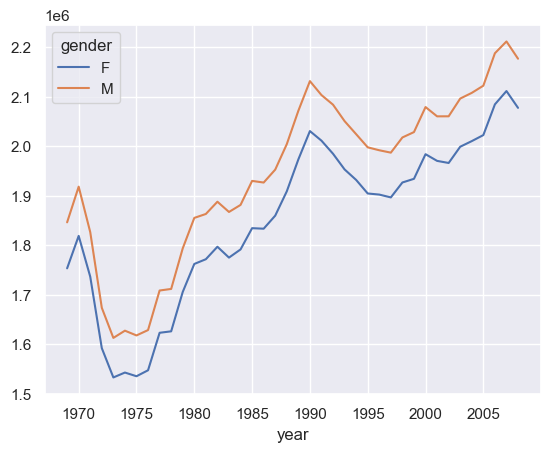

In [ ]:
%matplotlib inline
import matplotlib as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt

In [ ]:
quar = np.percentile(births['births'], [25, 50, 75])
mu = quar[1]
sig = 0.74 * (quar[2]- quar[0])

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu +  5 * @sig)')

In [ ]:
births['day'] = births['day'].astype(int)

In [ ]:
births.index = pd.to_datetime(10000*births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.day_of_week

<Axes: xlabel='dayofweek'>

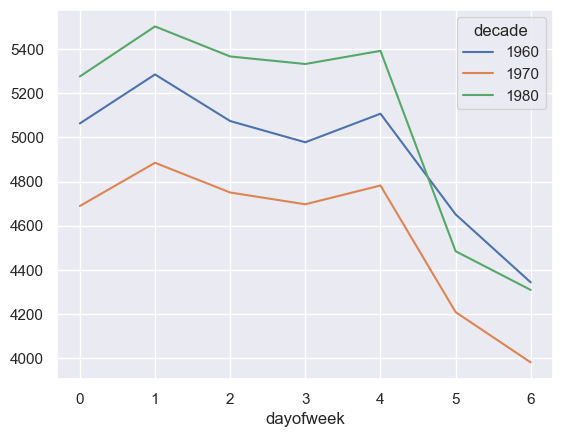

In [ ]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()


## 시계열 데이터 다루기

### 파이썬의 날짜와 시간

In [ ]:
from datetime import datetime
datetime(year=2024, month= 7, day=1)

datetime.datetime(2024, 7, 1, 0, 0)

In [ ]:
from dateutil import parser
date = parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

In [ ]:
date.strftime('%A')

'Sunday'

### Numpy의 시계열

In [ ]:
import numpy as np
date = np.array('2021-07-30', dtype= np.datetime64)
date

array('2021-07-30', dtype='datetime64[D]')

In [ ]:
date + np.arange(12)

array(['2021-07-30', '2021-07-31', '2021-08-01', '2021-08-02',
       '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
       '2021-08-07', '2021-08-08', '2021-08-09', '2021-08-10'],
      dtype='datetime64[D]')

In [ ]:
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [ ]:
np.datetime64('2024-07-01 15:50')

numpy.datetime64('2024-07-01T15:50')

In [ ]:
np.datetime64('2024-07-01 12:59:59.50','ns')

numpy.datetime64('2024-07-01T12:59:59.500000000')

### pandas의 시계열 데이터

In [ ]:
import pandas as pd
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [ ]:
date.strftime('%A')

'Sunday'

In [ ]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# 시계열 데이터로 인덱싱 가능
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04', '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [ ]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [ ]:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

In [ ]:
dates = pd.to_datetime([datetime(2021, 7, 3) , '4th of July, 2021', '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [ ]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# freq인수를 바꿔 간격 조절 가능 H는 시간단위
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\user\AppData\Local\Temp\ipykernel_13380\3585533245.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [ ]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [ ]:
# 코드를 활용해 다른 주기 지정 가능 ex 2시간 30분
pd.timedelta_range(0, periods=9, freq='2H30T')

C:\Users\user\AppData\Local\Temp\ipykernel_13380\39537051.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=9, freq='2H30T')
C:\Users\user\AppData\Local\Temp\ipykernel_13380\39537051.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=9, freq='2H30T')


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150min')

In [ ]:
## 영업일 오프셋
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## 리샘플링

In [ ]:
from pandas_datareader import data
import yfinance as yf
ticker = '^GSPC'

sp500 = yf.download(ticker, start="2020-01-01", end="2024-06-30")

sp500.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [ ]:
def create_sequences(data, seq_length, predict_steps):
    sequences = []
    for i in range(len(data) - seq_length - predict_steps + 1):
        seq = data[i:i + seq_length]
        label = data[i + seq_length:i + seq_length + predict_steps]
        sequences.append((seq, label))
    return sequences



In [ ]:
seq_length = 30
predict_steps = 5

In [ ]:
data = sp500['Close'].values
sequences = create_sequences(data, seq_length, predict_steps)


[(array([3257.85009766, 3234.85009766, 3246.2800293 , 3237.17993164,
         3253.05004883, 3274.69995117, 3265.35009766, 3288.12988281,
         3283.14990234, 3289.29003906, 3316.81005859, 3329.62011719,
         3320.79003906, 3321.75      , 3325.54003906, 3295.4699707 ,
         3243.62988281, 3276.23999023, 3273.39990234, 3283.65991211,
         3225.52001953, 3248.91992188, 3297.59008789, 3334.68994141,
         3345.7800293 , 3327.70996094, 3352.09008789, 3357.75      ,
         3379.44995117, 3373.93994141]),
  array([3380.15991211, 3370.29003906, 3386.14990234, 3373.22998047,
         3337.75      ])),
 (array([3234.85009766, 3246.2800293 , 3237.17993164, 3253.05004883,
         3274.69995117, 3265.35009766, 3288.12988281, 3283.14990234,
         3289.29003906, 3316.81005859, 3329.62011719, 3320.79003906,
         3321.75      , 3325.54003906, 3295.4699707 , 3243.62988281,
         3276.23999023, 3273.39990234, 3283.65991211, 3225.52001953,
         3248.91992188, 3297.590087